In [1]:
using PyPlot, PyCall
using Distributions

In [2]:
W = [1.0, 0.0, 1.0]
σ = 0.5
N = 20
X = range(-0.4, 2.4, length=N)
Y = [W[1] + W[2]*x + W[3]*x^2 + σ*randn() for x in X]
X_min = minimum(X)
X_max = maximum(X)

2.4

# single regression

\begin{align}
        y = w_1x
\end{align}


\begin{align}
       E = \sum_{i=0}^N(y_i - w_1 x_i)^2
\end{align}


\begin{align}
       \frac{\partial E}{\partial w_1}  
                                     &=2\sum_{i}(y_i - w_1x_i)(-x_i) \\ 
                                     &=2\sum_{i}(-y_i x_i + w_1x_i ^2)  = 0 \\
\therefore  w_1 &= \frac{\sum_{i} y_i x_i}{\sum_{i} x_i^2}
\end{align}

In [49]:
X_all = range(X_min, X_max, length=100)
W₁ = sum(Y .* X) / sum(X .^ 2)
Y1 = [W₁*x for x in X_all]

100-element Array{Float64,1}:
 -0.9779224337899971 
 -0.908776403117977  
 -0.8396303724459571 
 -0.770484341773937  
 -0.7013383111019171 
 -0.6321922804298971 
 -0.5630462497578771 
 -0.4939002190858571 
 -0.4247541884138371 
 -0.3556081577418171 
 -0.2864621270697971 
 -0.21731609639777713
 -0.14817006572575714
  ⋮                  
  5.106928265347762  
  5.176074296019782  
  5.245220326691802  
  5.314366357363822  
  5.383512388035842  
  5.452658418707863  
  5.521804449379882  
  5.5909504800519025 
  5.660096510723922  
  5.7292425413959425 
  5.798388572067963  
  5.867534602739982  

# multiple regression

$$
y = w_0 + w_1x_1 + \cdots  + w_Nx_N
$$

$$
 \mathbf y = \mathbf X \mathbf w
$$


\begin{align}
  \mathbf y = \left(
    \begin{array}{cccc}
      y_{0} \\
      y_{1} \\
      \vdots \\
      y_{N} 
    \end{array}
  \right)
\end{align}




\begin{align}
  \mathbf X = \left(
    \begin{array}{}
      1 & x_{11} & \ldots &  x_{1M} \\
      1 & x_{21} & \ldots & x_{2M} \\
      \vdots & \vdots & \ddots & \vdots \\
      1 & x_{N2} & \ldots & x_{NM}
    \end{array}
  \right)
\end{align}

\begin{align}
  \mathbf w = \left(
    \begin{array}{cccc}
      w_{0} \\
      w_{1} \\
      \vdots \\
      w_{N} 
    \end{array}
  \right)
\end{align}



\begin{align}
  E(\mathbf w) &= (\mathbf y - \mathbf X \mathbf w)^T(\mathbf y - \mathbf X \mathbf w) \\
       &= \mathbf y^T \mathbf y - 2 \mathbf y^T \mathbf X \mathbf w + \mathbf w^T \mathbf X^T \mathbf X \mathbf w \\
\therefore  \mathbf w &= (\mathbf X^T \mathbf X)^{-1}\mathbf X^T \mathbf y
\end{align}



In [50]:
X2 = zeros(N, 3)
X2[:, 1] .= 1
X2[:, 2] = X
X2[:, 3] = X.^2
W2 = inv(X2'*X2)*X2'*Y
Y2 = [W2[1] + W[2]*x + W[3]*x^2 for x in X_all]

100-element Array{Float64,1}:
 0.957166910323458 
 0.9353405660728713
 0.9151140585736366
 0.8964873878257537
 0.8794605538292227
 0.8640335565840437
 0.8502063960902165
 0.8379790723477413
 0.8273515853566179
 0.8183239351168464
 0.8108961216284268
 0.8050681448913592
 0.8008400049056434
 ⋮                 
 5.160623700446916 
 5.279582990315295 
 5.4001421169350285
 5.5223010803061126
 5.64605988042855  
 5.7714185173023385
 5.898376990927478 
 6.026935301303971 
 6.157093448431814 
 6.28885143231101  
 6.422209252941559 
 6.557166910323458 

# Plot

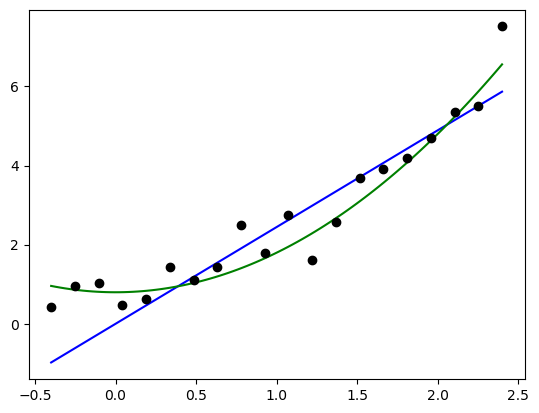

In [51]:
figure()
plot(X_all, Y1, "b-")
plot(X_all, Y2, "g-")
plot(X, Y, "ko")
show()